In [27]:
# import modules
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [28]:
diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [29]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [30]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [31]:
X = diabetes.data
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [32]:
y = diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [34]:
# Create a linear regression object: reg
reg = LinearRegression()

In [35]:
# Compute 5-fold cross-validation scores: cv_scores
cv_results = cross_val_score(reg, X, y, cv = 5) #function uses  R^2 as the metric of choice for regression

In [36]:
# Print the 5-fold cross-validation scores
print(cv_results)
print(f"Average 5-Fold CV Score: {np.mean(cv_results)}")

[0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
Average 5-Fold CV Score: 0.48231812211149394


In [37]:
# K-fold CV comparison : more folds = more computationally expensive
# %timeit : to see how long each k-fold CV takes

# Perform 3-fold CV
%timeit cvscores_3 = cross_val_score(reg, X, y, cv=3)

cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
%timeit cvscores_10 =  cross_val_score(reg, X, y, cv=10)

cvscores_10 =  cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

4.08 ms ± 785 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.4887027672471189
10.7 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.461962361958337


# Regularized regression
**Why regularize?
What fitting a linear regression does is minimize a loss function to choose a coefficient ai for each feature variable. If we allow these coefficients or parameters to be super large, we can get overfitting. For this reason, it is common practice to alter the loss function so that it penalizes for large coefficients. This is called regularization.**

# Ridge regression in sklearn (regularizes large coefficients to prevent overfitting [L2 regularization])

1. **The loss function is the standard OLS loss function plus the squared value of each coefficient multiplied by some constant alpha. Thus, when minimizing the loss function to fit to our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients.**
2. **When alpha is equal to zero, we get back OLS. Large coefficients in this case are not penalized and the overfitting problem is not accounted for. A very high alpha means that large coefficients are significantly penalized, which can lead to a model that is too simple and ends up underfitting the data.**

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [40]:
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

/opt/anaconda3/envs/data1/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.4798455619694978

**Fitting ridge regression models over a range of different alphas, and plot cross-validated  scores for each, using this function**

In [41]:
# plots the  score as well as standard error for each alpha
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [42]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

In [43]:
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use
    ridge.alpha = alpha
    
    # Perform 10-fold CV
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

/opt/anaconda3/envs/data1/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/opt/anaconda3/envs/data1/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previo

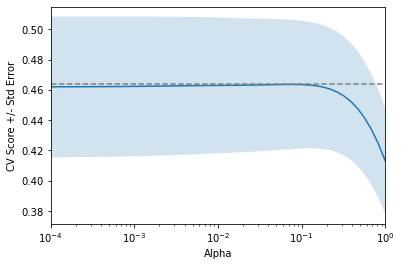

In [44]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)

# Lasso regression [L1 regularization]
1. **The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent**
2. **As the Lasso regression yields sparse models, it can thus be used to perform feature selection**

In [45]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[  0.          -0.         487.89292666 163.13595763  -0.
  -0.         -85.43951554   0.         423.41641493   0.        ]


/opt/anaconda3/envs/data1/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


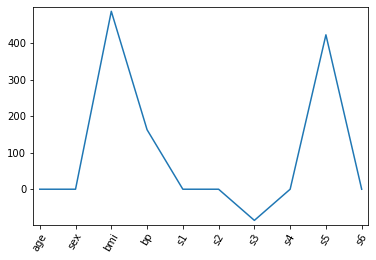

In [46]:
# Plot the coefficients
plt.plot(range(len(diabetes.feature_names)), lasso_coef)
plt.xticks(range(len(diabetes.feature_names)), diabetes.feature_names, rotation=60)
plt.margins(0.02)
plt.show()

In [47]:
#  :Attribute Information:
#       - age     age in years
#       - sex
#       - bmi     body mass index
#       - bp      average blood pressure
#       - s1      tc, total serum cholesterol
#       - s2      ldl, low-density lipoproteins
#       - s3      hdl, high-density lipoproteins
#       - s4      tch, total cholesterol / HDL
#       - s5      ltg, possibly log of serum triglycerides level
#       - s6      glu, blood sugar level